# Tema 4 TDS Naturaleza y Percepción de la Señal Acústica

### Rebeca Goya Esteban y Óscar Barquero Pérez

update: 10 de octubre de 2018

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Licencia de Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />Este obra está bajo una <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">licencia de Creative Commons Reconocimiento-NoComercial-CompartirIgual 4.0 Internacional</a>. 

## Ejercicio 1. 
Genere una onda sinusoidal de duración 1 seg con amplitud 1 y frecuencia de muestreo $1 KHz$. Varíe la frecuencia del tono $f_0 = [100,200,300] Hz$. Represente y reproduzca los sonidos de diferentes frecuencias.

<IPython.core.display.Javascript object>


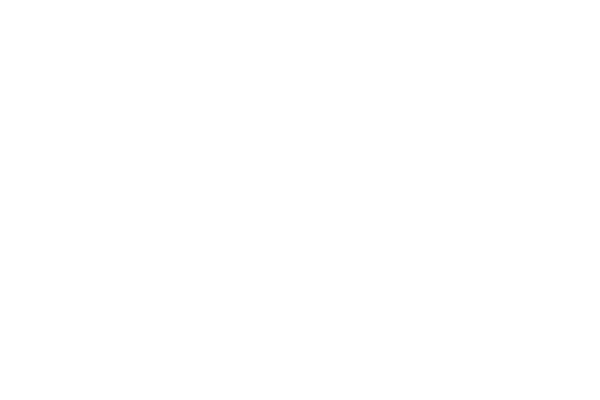

PortAudioError: Error opening OutputStream: Invalid sample rate [PaErrorCode -9997]

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Audio
#Example sinusoidal
A = 1 # Amplitude
f = 100 # Hz, fundamental frequency or pitch 
fs = 1000 # Hz, sampling frequency

t = np.arange(0,1,1/fs)
s = A*np.sin(2*np.pi*f*t)

plt.figure(figsize = (6,4))

plt.plot(t,s)

#Audio(s,rate = fs)

#try to sound using 
import sounddevice as sd

sd.play(s,fs)

## Ejercicio 2. 
Represente la onda sinusoidal del ejercicio 1 para $f0 = [5, 10] Hz$, compruebe gráicamente el valor de los $T_0$. Represente también el móulo de la $\mathcal{FFT}$ y compruebe el valor de $f_0$.

<IPython.core.display.Javascript object>


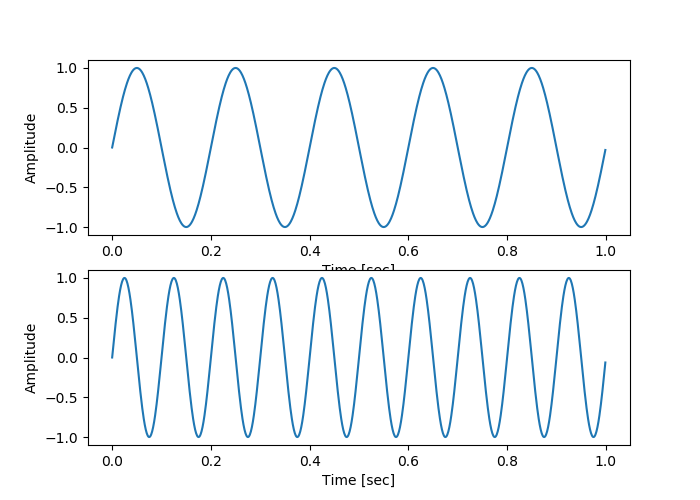

<IPython.core.display.Javascript object>


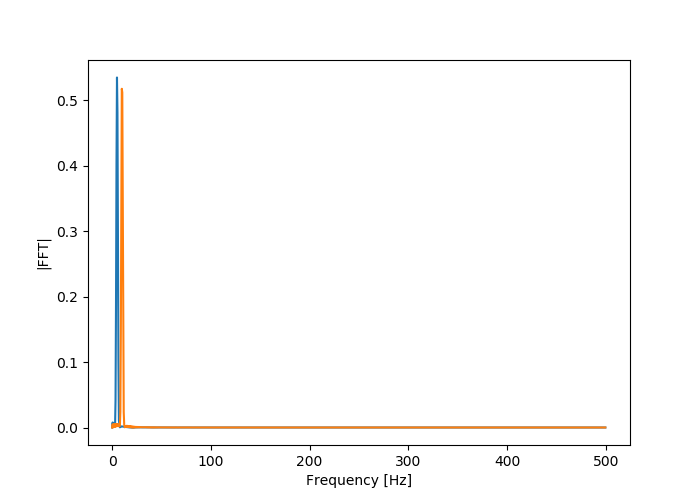

Text(0,0.5,'|FFT|')

In [2]:
%matplotlib notebook
import sys
import numpy as np
sys.path.append('../') #allows to import a module in a diff folder
from tds_utils import my_spectra

A= 1        #amplitude
f1= 5       #Hz, fundamental frequency or pitch signal 1, 
f2= 10      # Hz, fundamental frequency or pitch frequency signal 2, 
fs= 1000       # Hz, sampling frequency

#generate temporal axes
t = np.arange(0,1,1/fs)

#generate signals
s1= A*np.sin(2*np.pi*f1*t)
s2= A*np.sin(2*np.pi*f2*t)

#Plotting
plt.figure(figsize =(7,5))

plt.subplot(2,1,1)
plt.plot(t,s1)
plt.xlabel('Time [sec]')
plt.ylabel('Amplitude')          
plt.subplot(2,1,2)
plt.plot(t,s2)
plt.xlabel('Time [sec]')
plt.ylabel('Amplitude')

#power spectral density estimation
psd1,f = my_spectra(s1,fs)
psd2,f = my_spectra(s2,fs)

#plot positive frequencies

plt.figure(figsize =(7,5))

idx = f>=0
plt.plot(f[idx],psd1[idx])
plt.plot(f[idx],psd2[idx])
plt.xlabel('Frequency [Hz]')
plt.ylabel('|FFT|')

## Ejercicio 3

Represente el módulo de la FFT de la señal *ejemploEj3T4.npy*, identifique $f_0$ y y las frecuencias formantes.

<IPython.core.display.Javascript object>


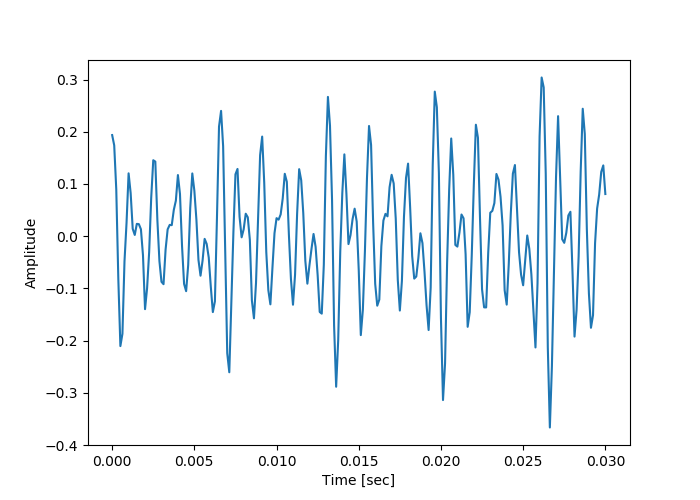

<IPython.core.display.Javascript object>


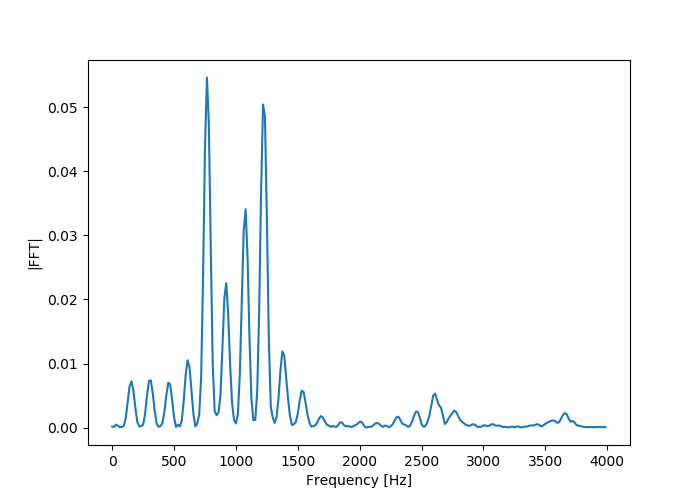

Text(0,0.5,'|FFT|')

In [3]:
%matplotlib notebook
#Loading ejemploEj3T4.npy
import numpy as np
ex = np.load('ejemploEj3T4.npy')

#get dictionary from a numpy object
ex = ex.item()


#get sampling frequency and trama
fs = ex['fs']

trama = ex['trama']


#plot signal
plt.figure(figsize = (7,5))

t = np.arange(0,len(trama)/fs,1/fs)

#plot representation
plt.plot(t,trama)
plt.xlabel('Time [sec]')
plt.ylabel('Amplitude') 
        
#power spectral density estimation 

psd,f = my_spectra(trama,fs)

#plot spectra

plt.figure(figsize =(7,5))

idx = f>=0
plt.plot(f[idx],psd[idx])
plt.xlabel('Frequency [Hz]')
plt.ylabel('|FFT|')


## Ejercicio 4

Represente en el dominio temporal y en el dominio espectral los fragmentos de una señal de voz contenidos *ejemploEj4AT4.npy* y *ejemploEj4BT4.npy*, tome $fs = 11000\ Hz$. Identifique qué fragmento es sonoro y qué fragmento es sordo.

<IPython.core.display.Javascript object>


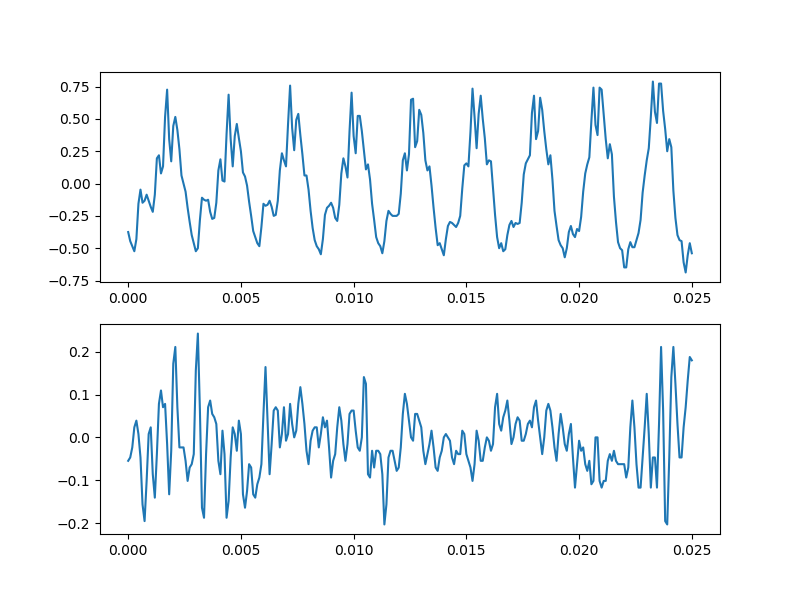

<IPython.core.display.Javascript object>


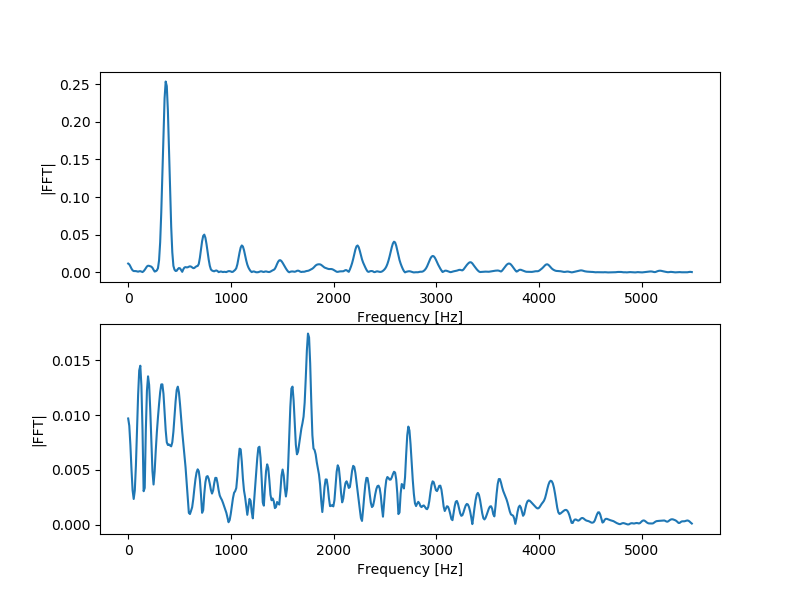

[0.00017745 0.00050697 0.00077483 ... 0.00076958 0.00077483 0.00050697]


In [11]:
from IPython.display import Audio
#Load examples
trama1 = np.load('ejemploEj4AT4.npy')
trama2 = np.load('ejemploEj4BT4.npy')
fs = 11e3

#time vectors
t1 = np.arange(0,len(trama1)/fs,1/fs)
t2 = np.arange(0,len(trama2)/fs,1/fs)


#Plot segments

plt.figure(figsize = (8,6))
plt.subplot(211)
plt.plot(t1,trama1)

plt.subplot(212)
plt.plot(t2,trama2)

#power spectral density estimation 
psd1,f1 = my_spectra(trama1,fs)
psd2,f2 = my_spectra(trama2,fs)

#plot spectra
plt.figure(figsize = (8,6))
plt.subplot(211)
idx1 = f1>=0
plt.plot(f1[idx1],psd1[idx1])
plt.xlabel('Frequency [Hz]')
plt.ylabel('|FFT|')

plt.subplot(212)
idx2 = f2>= 0
plt.plot(f2[idx2],psd2[idx2])
plt.xlabel('Frequency [Hz]')
plt.ylabel('|FFT|')

print(psd1)


In [10]:
print(idx1)
#print(psd1[idx1]> 0.04)
#print(idx1)
array_positivo = []
h=0

longitud_frecuencia = len(idx1)
print(longitud_frecuencia)
h=0
n=0
while n<longitud_frecuencia:
    if idx1[h]==False:
        h = h+1
    n=n+1
print(h)

umbral = 0.2

array_val = []
array_freq = []
k=0
for i in psd1:
    print(i)
    if i > umbral:
        array_val.append(i)
        array_freq.append(k)
        #print(array_val)
        #print(array_freq)
    k=k+1
j=1        

#print(len(array_val))
while j < len(array_val):
    if array_val[j] < array_val[j-1]:
        FFT_pitch = array_val[j-1]
        pitch = array_freq[j-1]
        print(FFT_pitch)
        print(pitch)
        break
        
    j=j+1

#print (f1)   



[ True  True  True ... False False False]
1024
0
0.00017744858055985578
0.0005069692866389156
0.0007748258904379643
0.0007695832963765734
0.0005447876479733892
0.0002626752007529159
0.00011347620059142895
0.00013848608881216205
0.00018606529307537749
0.0002244298503589029
0.0002423762316498007
0.00033667413999978983
0.0004786345705371059
0.0005257989279436165
0.00041806859240404667
0.00021530707010152366
0.00013213895197924022
0.0002838046149321125
0.0004887511193289769
0.0006966593652647883
0.0007844242424624386
0.0006618905705137346
0.0003980334033275621
0.00038912275227675775
0.0006648729174123896
0.0009123549828387715
0.0011870047376999991
0.0015633931357772538
0.0019596822553904613
0.00224149884536092
0.0023173466945938855
0.002145789778087634
0.0017335638393170612
0.0011533061218642433
0.0005768207344488817
0.00048562016605369583
0.0008605404164103244
0.0011792807406378395
0.0013314332452092257
0.0012844118583027488
0.001086359797449163
0.0008857065188160472
0.0007913646866293704